In [86]:
from keras.datasets import fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [87]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt 
from keras.utils import to_categorical
import numpy as np


In [88]:
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

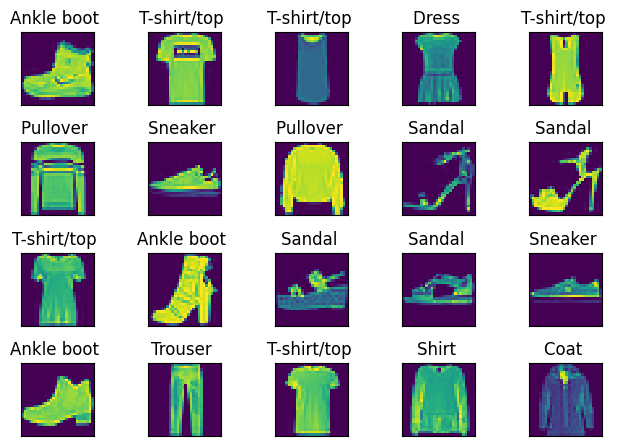

In [89]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],interpolation = 'none')
  so_2 = y_train[i]
  plt.title('{} '.format(class_names[so_2]))
  plt.xticks([])
  plt.yticks([])

In [90]:
print('X_train: ', x_train.shape)
print('X_test: ', x_test.shape)
print('Y_train: ',y_train.shape)
print('Y_test: ',y_test.shape)


X_train:  (60000, 28, 28)
X_test:  (10000, 28, 28)
Y_train:  (60000,)
Y_test:  (10000,)


In [91]:
#Xay dung mo hinh
model = Sequential()
#lop an thu 1
model.add(Dense(1024, activation ='relu', input_shape = (28*28,), name = 'layer1'))
#lop an thu 2
model.add(Dense(512,activation = 'relu', name = 'Layer2'))
#lop an thu 3
model.add(Dense(512,activation = 'relu', name = 'Layer3'))
#lop an thu 4
model.add(Dense(512,activation = 'relu', name = 'Layer4'))
#lop an thu 5
model.add(Dense(216,activation = 'relu', name = 'Layer5'))
#lop an thu 6
model.add(Dense(216,activation = 'relu', name = 'Layer6'))
#lop an thu 7
model.add(Dense(10, activation='softmax',name = 'Layer7'))

model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1024)              803840    
                                                                 
 Layer2 (Dense)              (None, 512)               524800    
                                                                 
 Layer3 (Dense)              (None, 512)               262656    
                                                                 
 Layer4 (Dense)              (None, 512)               262656    
                                                                 
 Layer5 (Dense)              (None, 216)               110808    
                                                                 
 Layer6 (Dense)              (None, 216)               46872     
                                                                 
 Layer7 (Dense)              (None, 10)               

In [92]:
#Tien xu ly du lieu dau vao
x_train = x_train.reshape((60000,28*28)) # chia hinh anh 2D thanh 1D de khop voi input network
x_train= x_train.astype('float32')/255   # vi anh la cac day mau tu 0 den 255 nen phai chuyen thanh kieu so thuc 

x_test = x_test.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [93]:
import keras.metrics as metrics 
from keras.callbacks import EarlyStopping
model.compile (optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 50, batch_size = 128,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
375/375 [==============================] - 25s 64ms/step - loss: 0.7603 - accuracy: 0.7143 - val_loss: 0.4567 - val_accuracy: 0.8378
Epoch 2/50
375/375 [==============================] - 25s 66ms/step - loss: 0.4514 - accuracy: 0.8350 - val_loss: 0.5016 - val_accuracy: 0.8254
Epoch 3/50
375/375 [==============================] - 24s 65ms/step - loss: 0.3902 - accuracy: 0.8571 - val_loss: 0.3864 - val_accuracy: 0.8643
Epoch 4/50
375/375 [==============================] - 23s 62ms/step - loss: 0.3523 - accuracy: 0.8715 - val_loss: 0.3527 - val_accuracy: 0.8756
Epoch 5/50
375/375 [==============================] - 22s 60ms/step - loss: 0.3265 - accuracy: 0.8792 - val_loss: 0.4106 - val_accuracy: 0.8545
Epoch 6/50
375/375 [==============================] - 25s 66ms/step - loss: 0.3095 - accuracy: 0.8853 - val_loss: 0.3888 - val_accuracy: 0.8678
Epoch 7/50
375/375 [==============================] - 25s 68ms/step - loss: 0.2977 - accuracy: 0.8901 - val_loss: 0.3602 - val_accuracy:

In [96]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Do chinh xac tren tap kiem tra: ',test_acc)
print('Ham mat mat tren tap kiem tra: ', test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.5635 - accuracy: 0.8905
Do chinh xac tren tap kiem tra:  0.890500009059906
Ham mat mat tren tap kiem tra:  0.5634971857070923


1/1 [==============================] - 0s 26ms/step
This is Bag


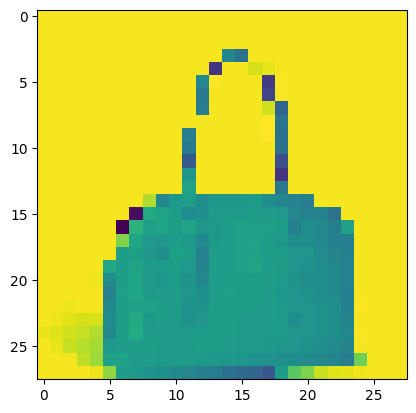

In [107]:
#Du doan tren hinh anh moi
from keras.utils import load_img
from keras.utils.image_utils import img_to_array 
import numpy as np

url = 'bag_!.png'
img = load_img(url)
#plt.imshow(img)

img = load_img(url,color_mode= 'grayscale',target_size = (28,28))
plt.imshow(img)
img = img_to_array(img)
img = img[:,:,0]
img = img.reshape((1,28*28))
img = img.astype('float32')/255
so = int(np.argmax(model.predict(img),axis =1))
print("This is",class_names[so])

In [100]:
#save
model.save('fashion_mnist.h')